In [1]:
import pickle
import numpy as np
from sklearn.cluster import DBSCAN
import folium
import random
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
raw_data = pickle.load(open('data/geo_data_in_kyoto_city_RAW.pickle', 'rb'))

len(raw_data)

120321

In [3]:
raw_data

[{'P_v_id': 1188326, 'Longitude': '135.686645', 'Latitude': '35.047986'},
 {'P_v_id': 1188328, 'Longitude': '135.686645', 'Latitude': '35.047986'},
 {'P_v_id': 1188330, 'Longitude': '135.686645', 'Latitude': '35.047986'},
 {'P_v_id': 1905433, 'Longitude': '135.754108', 'Latitude': '34.985846'},
 {'P_v_id': 1905434, 'Longitude': '135.754108', 'Latitude': '34.985846'},
 {'P_v_id': 1905437, 'Longitude': '135.854187', 'Latitude': '35.01411'},
 {'P_v_id': 2157995, 'Longitude': '135.796999', 'Latitude': '34.925968'},
 {'P_v_id': 2602768, 'Longitude': '135.74604', 'Latitude': '35.000472'},
 {'P_v_id': 2610454, 'Longitude': '135.747756', 'Latitude': '35.013407'},
 {'P_v_id': 2610472, 'Longitude': '135.747756', 'Latitude': '35.013407'},
 {'P_v_id': 2638161, 'Longitude': '135.782347', 'Latitude': '35.015324'},
 {'P_v_id': 2638163, 'Longitude': '135.782347', 'Latitude': '35.015324'},
 {'P_v_id': 2638177, 'Longitude': '135.854187', 'Latitude': '35.01411'},
 {'P_v_id': 2638180, 'Longitude': '135.85

In [4]:
raw_points = []

for p in raw_data:
    raw_points.append([float(p['Latitude']), float(p['Longitude'])])
    
raw_points = np.array(raw_points)
len(raw_points)

120321

In [5]:
geo_data_in_kyoto_city_dict = {}

for x in raw_data:
    key = (float(x['Latitude']), float(x['Longitude']))
    if key not in geo_data_in_kyoto_city_dict:
        geo_data_in_kyoto_city_dict[key] = [x['P_v_id']]
    else:
        geo_data_in_kyoto_city_dict[key].append(x['P_v_id'])
        

In [6]:
# Convert to radians

# raw_radian = np.radians(raw_points)
input_geo_deg_array = np.array(list(geo_data_in_kyoto_city_dict.keys()))
raw_radian = np.radians(input_geo_deg_array)



In [7]:
len(raw_radian)

34066

In [8]:
def dbscan_clustering(eps, min_samples, data): 
    eps = eps/6371.0088
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, algorithm='ball_tree', metric='haversine')
    
    dbscan.fit(data)
    labels = dbscan.labels_
    
    print(len(labels))
    print(len(input_geo_deg_array))
    
    clustering_result = {}
    for i in range(len(labels)):
        if labels[i] not in clustering_result:
            clustering_result[labels[i]] = []
        clustering_result[labels[i]].append(input_geo_deg_array[i])
        
    how_many_clusters = max(clustering_result.keys()) + 1
    
    return clustering_result, labels

In [9]:
result, labels = dbscan_clustering(0.05, 10, raw_radian)

34066
34066


In [10]:
max(labels)

234

In [11]:
used_label = []
plot_points = []
c_list = []
for k in result: 
    if k==-1:
        continue
    l = random.randint(1,len(labels))
    while l in used_label:
        l = random.randint(1, len(labels))
    for p in result[k]:
        plot_points.append(p)
        c_list.append(l)
plot_points = np.array(plot_points)
c_list = np.array(c_list)

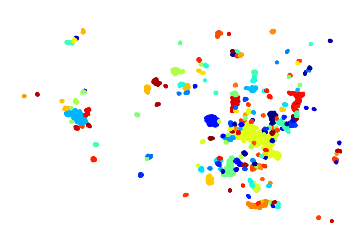

In [12]:
import matplotlib as mpl
plt.xlim([135.636645, 135.820645])
plt.ylim([34.957986, 35.073986])
plt.rcParams["figure.figsize"] = [15,10]

cmap = plt.get_cmap('jet', len(labels))

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.scatter(plot_points[:,1],plot_points[:,0], c=c_list, cmap=cmap, s=5)

# plt.savefig('fig/dbscan.png', bbox_inches='tight')

In [13]:
# dbscan_map = folium.Map(location=[34.48885,135.3916],zoom_start=8)

# for p in result:
#     if p == -1:
#         continue
#     folium.Circle(
#         radius=1,
#         location = p,
#         color='red',
#         fill=True,
#         fill_color = 'red',
#         fill_opacity = 1
#     ).add_to(dbscan_map)

# dbscan_map

In [14]:
#重複部分の矩形
def intersect_bound(a, b):
    x1 = max(a.x1, b.x1)
    y1 = max(a.y1, b.y1)
    x2 = min(a.x2, b.x2)
    y2 = min(a.y2, b.y2)
    return x1, y1, x2, y2

# def is_rectangle(x1, y1, x2, y2):
#     return x1 <= x2 and y1 <= y2

# 重複条件
def is_rectangle(rec):
    x1 = rec[0]
    y1 = rec[1]
    x2 = rec[2]
    y2 = rec[3]
    return x1 <= x2 and y1 <= y2

# 重複判定
def has_intersect(a, b):
    return is_rectangle(intersect_bound(a, b))

# 重複部分の矩形インスタンスを返す
def intersect(a, b):
    return Rectangle(max(a.x1, b.x1), max(a.y1, b.y1),
        min(a.x2, b.x2), min(a.y2, b.y2))
    
# 矩形の面積計算
def area_calculate(rect):
    return (rect.x2 - rect.x1) * (rect.y2 - rect.y1)

# クラス定義
class Rectangle(object):
    def __init__(self, x1, y1, x2, y2):
        if not is_rectangle((x1, y1, x2, y2)):
#             raise ValueError("Coordinates are invalid.\n" +
#                              "Rectangle" + str((x1, y1, x2, y2)))
            print("an error ocurred with Rectangle" + str((x1, y1, x2, y2)))
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2

    def __repr__(self):
        return ("Rectangle" + str((self.x1, self.y1, self.x2, self.y2)))



In [15]:
def get_dbscan_rec_dic(clustering_result):
    """
    クラスタリング結果を入力にとり、各クラスタを被覆する最小矩形を作る
    
    Parameters
    ----------
    clustering_result : {クラスタ1:[位置座標配列１，位置座標配列2,...], クラスタ2:[位置座標配列１，位置座標配列2,...]}　という辞書
    
    Returns
    -------
    dbscan_rec_dic : dict
        DBSCANで生成された各クラスタの矩形を表す辞書。 {クラスタ番号 : Rectangle(min_x, min_y, max_x, max_y), ...} このx,yの値は、緯度経度ではなく、平面座標系に変換した値。
    """
    
    wgs84 = pyproj.Proj(init='EPSG:4326') # WGS84 緯度経度
    rect6 = pyproj.Proj(init='EPSG:2448') # 平面直角座標6系

    dbscan_rec_dic = {}

    for key in clustering_result:
        lats = [x[0] for x in clustering_result[key]]
        lngs = [x[1] for x in clustering_result[key]]
        min_lat = min(lats)
        min_lng = min(lngs)
        max_lat = max(lats)
        max_lng = max(lngs)
        min_x, min_y = pyproj.transform(wgs84, rect6, min_lng, min_lat)
        max_x, max_y = pyproj.transform(wgs84, rect6, max_lng, max_lat)
        # ここに、平面座標系への変換をかませる
        dbscan_rec_dic[key] = Rectangle(min_x, min_y, max_x, max_y)
        
    return dbscan_rec_dic

In [16]:
def dbscan_mbr(result):
    dbscan_rec_dic = {}

    for key in result:
        if key==-1:
            continue
        lats = [x[0] for x in result[key]]
        lngs = [x[1] for x in result[key]]
        min_lat = min(lats)
        min_lng = min(lngs)
        max_lat = max(lats)
        max_lng = max(lngs)
        dbscan_rec_dic[key] = Rectangle(min_lat, min_lng, max_lat, max_lng)
    return dbscan_rec_dic

In [17]:
# 10 Typical MBR for tuning
typical_MBR = [
       [35.026399, 135.797287, 35.027682, 135.799124],
       [34.982715, 135.708253, 34.985343, 135.711431],
       [34.979333, 135.746247, 34.983067, 135.749229],
       [34.985190, 135.741425, 34.987484, 135.743882],
       [35.028084, 135.711858, 35.031405, 135.715256],
       [34.999215, 135.772571, 35.001333, 135.775053],
       [35.113069, 135.769121, 35.118962, 135.774616],
       [35.010058, 135.789245, 35.012630, 135.795986],
       [35.119007, 135.833763, 35.120256, 135.835130],
       [35.000546, 135.779901, 35.001284, 135.782844],
      ]

In [18]:
def poi_mbr(MBR):
    poi_mbr_dict = {}
    for m in range(len(MBR)):
        poi_mbr_dict[m] = Rectangle(MBR[m][0], MBR[m][1], MBR[m][2], MBR[m][3])
        
    return poi_mbr_dict
poi_mbr_dict = poi_mbr(typical_MBR)

In [19]:
def calc_final_dice_score_average(mainspot_rec_dic, dbscan_rec_dic):
    mainspot_max_dsc_dic = copy.deepcopy(mainspot_rec_dic)

    for spot_name, each_main_spot_rec in mainspot_rec_dic.items():
        each_main_spot_dice_score_list = []
        for each_dbscan_spot_rec in dbscan_rec_dic.values():
            if has_intersect(each_main_spot_rec, each_dbscan_spot_rec):
                each_main_spot_dice_score_list.append(dice_similarity(area_calculate(intersect(each_main_spot_rec, each_dbscan_spot_rec)), area_calculate(each_main_spot_rec), area_calculate(each_dbscan_spot_rec)))
        if len(each_main_spot_dice_score_list) == 0:
            mainspot_max_dsc_dic[spot_name] = 0
        else:
            mainspot_max_dsc_dic[spot_name] = max(each_main_spot_dice_score_list)
        
    c = 0
    dsc_sum = 0
    for x in mainspot_max_dsc_dic.values():
        if x != 0:
            c += 1
            dsc_sum += x
    final_dice_score_average = dsc_sum / c
    
    return final_dice_score_average

In [20]:
def calculate_percentage(mainspot_rec_dic, dbscan_rec_dic):
    dbscan_rec_dic = dbscan_rec_dic
    mainspot_rec_dic = mainspot_rec_dic

    # クラスタの合計面積を考える。
    total_area = 0
    for area in dbscan_rec_dic.values():
        # 各クラスタの面積計算
        total_area += area_calculate(area)
    
    area_sum = 0
    for p in mainspot_rec_dic.values():
        for q in dbscan_rec_dic.values():
            # 重複判定偽
            if not has_intersect(p,q):
                continue # 本当はラベル付とかを行うけど、今はパス
            # 重複判定真
            else:
                # 重複部の面積を計算する
                # 面積を足し合わせていく
                area_sum += area_calculate(intersect(p,q))

    # 割合を計算
    percentage = 100 * (area_sum / total_area)
    
    return percentage

In [21]:
def params_inputer(eps_list, min_samples_list):
    params_list = []
    for eps in eps_list:
        for min_sample in min_samples_list:
            params_list.append((eps, min_sample))
    return params_list

In [22]:
def param_result_dict(result_dict, params, score):
    
    result_dict[params] = score

In [23]:
# area_intersectは重複領域の面積（の総和）、area_a, area_bは各領域の面積（の総和）
def dice_similarity(area_intersect, area_a, area_b):
    # 定義通りに計算
    d = (2 * area_intersect) / (area_a + area_b)
    return d

In [24]:
from tqdm import tqdm_notebook as tqdm
import copy

# 20190121ver
result_dict = {}
plot_tuning_dict = {}
for each_param in tqdm(params_inputer([x / 1000 for x in range(50,150,50)],[x for x in range(5,50,5)])):
    dbscan_rec_dic = dbscan_mbr(dbscan_clustering(each_param[0], each_param[1], raw_radian)[0])
    print(len(dbscan_rec_dic))
    poi_rec_dic = poi_mbr_dict
    dice_score = calc_final_dice_score_average(poi_rec_dic, dbscan_rec_dic)
    param_result_dict(result_dict, each_param, dice_score)
#     param_result_dict(result_dict, each_param, dice_similarity(calc_intersect_area(dbscan_rec_dic, mainspot_rec_dic), calc_dbscan_area(dbscan_rec_dic), sum_mainspot_area))

<ipython-input-24-8616803f4cb4>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for each_param in tqdm(params_inputer([x / 1000 for x in range(50,150,50)],[x for x in range(5,50,5)])):


  0%|          | 0/18 [00:00<?, ?it/s]

34066
34066
448
34066
34066
235
34066
34066
159
34066
34066
116
34066
34066
90
34066
34066
83
34066
34066
77
34066
34066
70
34066
34066
66
34066
34066
287
34066
34066
165
34066
34066
114
34066
34066
94
34066
34066
84
34066
34066
74
34066
34066
68
34066
34066
67
34066
34066
58


In [25]:
pickle.dump(result_dict, open('output/dbscan_tuning_kyoto', 'wb'))

In [26]:
optimum_params = max(result_dict, key=result_dict.get)
optimum_params

(0.05, 25)

In [27]:
optimum_result = dbscan_clustering(optimum_params[0], optimum_params[1], raw_radian)[0]

34066
34066


In [28]:
optimum_result = dbscan_clustering(0.05, 5, raw_radian)[0]

34066
34066


In [29]:
geo_data_in_kyoto_city_dict[tuple(optimum_result[0][0])]

[2610454,
 2610472,
 4020767,
 4020768,
 4020772,
 4020786,
 4020791,
 4020810,
 4020815,
 4020820,
 4020843,
 4020848,
 4020856,
 4020857,
 4020867,
 4020874,
 4020882,
 4020886,
 4020889,
 4020891,
 4020896,
 4020917]

In [30]:
len(optimum_result)

449

In [31]:
from haversine import haversine

def compute_cluster_density(data):
    density = {}
    for c in data:
        if c==-1:
            continue
            
        c_points = np.array(data[c])
        
        min_lat = min(c_points[:,0])
        min_lng = min(c_points[:,1])
        max_lat = max(c_points[:,0])
        max_lng = max(c_points[:,1])
        
        cluster_area = haversine((min_lat, min_lng), (min_lat, max_lng))*1000 * haversine((min_lat, min_lng), (max_lat, min_lng))*1000
#         cluster_area = haversine(up_left, up_right)*1000 * haversine(up_left, down_left)*1000
        cluster_photos = len(c_points)
#         if cluster_area < 2500:
#             cluster_density = 0
#         else:
        cluster_density = cluster_area/cluster_photos
        
        print('Density: ', cluster_density)
        density[c] = cluster_density
    return density

In [32]:
density = compute_cluster_density(optimum_result)

Density:  961.0430505614951
Density:  604.6009386623788
Density:  1124.6388105152193
Density:  416.4963868393702
Density:  288.06021385143947
Density:  755.4189845941146
Density:  57.15020068872319
Density:  1123.6984496818668
Density:  1148.9842849520828
Density:  815.4859209225881
Density:  529.4199692299627
Density:  717.4465219065042
Density:  1640.3124450704026
Density:  773.0508968881803
Density:  286.2120565439477
Density:  799.343527414685
Density:  946.6251256747775
Density:  284.4301751275717
Density:  220.92971682535645
Density:  1289.1664755192419
Density:  553.1013128748647
Density:  932.6812536017184
Density:  626.8663427596466
Density:  366.6595191004861
Density:  577.2617867743147
Density:  598.5457886268686
Density:  1484.4476382034068
Density:  728.3097925088312
Density:  1235.9856090580824
Density:  898.8335577910755
Density:  684.5271941400857
Density:  659.2097777482124
Density:  968.8152105995081
Density:  680.4223390080722
Density:  236.05612298260837
Density:  6

In [33]:
# reference: gaussian kernel mean shift clustering

import mean_shift_1 as ms1

def spot_clustering(data, density):
    clusters = []
    photos = []
    gps_spotcenter_dict = {}
    gps_dbscancenter_dict = {}
    for c in data:
        if c==-1:
            continue
        print('Cluster: ', c)
        c_points = np.array(data[c])
        dens = density[c]/max(density.values())
        
        if dens == 0.0:
            bandwidth = 50/100000
        else:
            bandwidth = (50 * dens  ) / 100000

        # Fix bandwidth
#         bandwidth = 0.0002
            
        print('Bandwidth:', bandwidth)
        
        model = ms1.MeanShift(kernel_func=ms1.gaussian_kernel, bandwidth=bandwidth, n_jobs=-1)
        y_prime = model.fit_predict(c_points)
        
        print(len(c_points))
        print(len(y_prime))
        
        for center in range(len(model.cluster_centers_)):
            freq = 0
            y_prime_index = []
            for l in range(len(y_prime)):
                if y_prime[l] == center:
                    y_prime_index.append(l)
                    freq += 1
            if freq > 2:
                clusters.append(model.cluster_centers_[center])
                photos.append(freq)
                for index in y_prime_index:
                    gps_spotcenter_dict[tuple(data[c][index])] = model.cluster_centers_[center]
                    gps_dbscancenter_dict[tuple(data[c][index])] = c
        
    return clusters, photos, gps_spotcenter_dict, gps_dbscancenter_dict

In [34]:
clusters, photos, gps_spotcenter_dict, gps_dbscancenter_dict = spot_clustering(optimum_result, density)

Cluster:  196
Bandwidth: 0.00023674843567063526


/Users/junjiesun/GIT/POIDiscovery/mean_shift_1.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.cluster_centers_by_popularity_ = np.array(sorted(final_clusters, key=lambda x: -x[1]))


7
7
Cluster:  0
Bandwidth: 0.00014894059776998176
790
790
Cluster:  1
Bandwidth: 0.0002770494817359121
1436
1436
Cluster:  2
Bandwidth: 0.00010260192609382294
334
334
Cluster:  3
Bandwidth: 7.096227892021278e-05
918
918
Cluster:  4
Bandwidth: 0.00018609391408019188
234
234
Cluster:  5
Bandwidth: 1.4078683159316292e-05
5
5
Cluster:  445
Bandwidth: 0.00027681782826718135
18
18
Cluster:  6
Bandwidth: 0.00028304687486540756
17
17
Cluster:  7
Bandwidth: 0.00020089112134680204
6944
6944
Cluster:  8
Bandwidth: 0.00013042011953029502
900
900
Cluster:  9
Bandwidth: 0.00017673957648355572
1506
1506
Cluster:  10
Bandwidth: 0.0004040832563687984
172
172
Cluster:  11
Bandwidth: 0.0001904374527500392
1077
1077
Cluster:  12
Bandwidth: 7.050699405949161e-05
316
316
Cluster:  13
Bandwidth: 0.00019691451862464195
28
28
Cluster:  14
Bandwidth: 0.00023319664768303909
402
402
Cluster:  15
Bandwidth: 7.006803595284787e-05
510
510
Cluster:  16
Bandwidth: 5.442499669603792e-05
11
11
Cluster:  17
Bandwidth: 0.

24
24
Cluster:  127
Bandwidth: 0.00018213337289070747
23
23
Cluster:  128
Bandwidth: 3.2704343126412933e-06
5
5
Cluster:  261
Bandwidth: 0.00016872382472097203
5
5
Cluster:  129
Bandwidth: 0.00021285325668735368
15
15
Cluster:  130
Bandwidth: 0.00022832796010037302
51
51
Cluster:  131
Bandwidth: 0.0001576679959781628
5
5
Cluster:  132
Bandwidth: 0.0001488815023273019
7
7
Cluster:  133
Bandwidth: 1.129226883864639e-05
7
7
Cluster:  134
Bandwidth: 3.646778566477708e-06
5
5
Cluster:  135
Bandwidth: 0.00011991480651637154
100
100
Cluster:  136
Bandwidth: 0.0002613633718327899
15
15
Cluster:  137
Bandwidth: 0.00015378622434556033
11
11
Cluster:  233
Bandwidth: 0.00017532034637029228
10
10
Cluster:  139
Bandwidth: 0.0002933790029787952
45
45
Cluster:  141
Bandwidth: 0.0001120862467240241
16
16
Cluster:  142
Bandwidth: 0.00020885617494619893
33
33
Cluster:  264
Bandwidth: 0.00024098485391540436
7
7
Cluster:  160
Bandwidth: 7.404778394217396e-05
12
12
Cluster:  143
Bandwidth: 0.000173458305722

9
9
Cluster:  288
Bandwidth: 8.436586856401075e-05
5
5
Cluster:  405
Bandwidth: 0.00010198443576148563
5
5
Cluster:  302
Bandwidth: 0.00021122543533946491
11
11
Cluster:  290
Bandwidth: 0.00015439173806767778
24
24
Cluster:  291
Bandwidth: 6.92582988008917e-05
7
7
Cluster:  292
Bandwidth: 2.0713268860984897e-05
6
6
Cluster:  349
Bandwidth: 0.0001461136143268655
5
5
Cluster:  293
Bandwidth: 3.3509643695752036e-05
22
22
Cluster:  294
Bandwidth: 0.0001167056764882676
6
6
Cluster:  296
Bandwidth: 8.641849229414623e-05
16
16
Cluster:  297
Bandwidth: 9.310629957862341e-06
10
10
Cluster:  298
Bandwidth: 7.025175533952018e-05
7
7
Cluster:  299
Bandwidth: 5.7494721126488895e-05
5
5
Cluster:  301
Bandwidth: 0.0001069818802818745
24
24
Cluster:  446
Bandwidth: 0.00014226494789125146
5
5
Cluster:  304
Bandwidth: 0.00013274535648664695
8
8
Cluster:  305
Bandwidth: 7.597036789796476e-05
7
7
Cluster:  306
Bandwidth: 9.256395327071515e-05
6
6
Cluster:  307
Bandwidth: 7.363154101385806e-05
4
4
Cluster:

In [35]:
gps_dbscancenter_dict

{(34.985846, 135.754108): 196,
 (34.986268, 135.753765): 196,
 (34.986026, 135.753799): 196,
 (34.9858, 135.753916): 196,
 (34.985846, 135.75325): 196,
 (34.985977, 135.753691): 196,
 (34.985494, 135.753608): 196,
 (35.014321, 135.745697): 0,
 (35.014392, 135.745525): 0,
 (35.014813, 135.745525): 0,
 (35.014532, 135.745868): 0,
 (35.013267, 135.746383): 0,
 (35.013533, 135.746333): 0,
 (35.013126, 135.746469): 0,
 (35.013126, 135.745868): 0,
 (35.013098, 135.746223): 0,
 (35.012883, 135.746799): 0,
 (35.013683, 135.746313): 0,
 (35.013267, 135.746212): 0,
 (35.013333, 135.746166): 0,
 (35.013333, 135.746333): 0,
 (35.013475, 135.746244): 0,
 (35.013, 135.746333): 0,
 (35.012666, 135.746333): 0,
 (35.01295, 135.7485): 0,
 (35.012845, 135.748615): 0,
 (35.012142, 135.748872): 0,
 (35.012845, 135.748958): 0,
 (35.012777, 135.748661): 0,
 (35.012919, 135.748794): 0,
 (35.012958, 135.748775): 0,
 (35.012516, 135.748705): 0,
 (35.013044, 135.748511): 0,
 (35.013004, 135.748752): 0,
 (35.0129

In [36]:
spot_id_mapping = {}
sid = 0

for s in gps_spotcenter_dict:
    if tuple(gps_spotcenter_dict[s]) not in spot_id_mapping:
        spot_id_mapping[tuple(gps_spotcenter_dict[s])] = sid
        sid+=1
len(spot_id_mapping)

1512

In [37]:
print(sid)

1512


In [38]:
columns = ['p_v_id', 'photo_gps', 'dbscan_id', 'spot_id', 'spot_gps' ]
df_data = []
for p in raw_data:
    temp = []
    key = tuple([float(p['Latitude']), float(p['Longitude'])])
    
    if key in gps_spotcenter_dict:
        temp.append(p['P_v_id'])
        temp.append(list(key))
        temp.append(gps_dbscancenter_dict[key])
        temp.append(spot_id_mapping[tuple(gps_spotcenter_dict[key])])
        temp.append(gps_spotcenter_dict[key])
        df_data.append(temp)
print(len(df_data))

spot_df = pd.DataFrame(data=df_data, columns=columns)
spot_df

76147


,p_v_id,photo_gps,dbscan_id,spot_id,spot_gps
0,1905433,"[34.985846, 135.754108]",196,0,"[34.9859873642544, 135.75379232150414]"
1,1905434,"[34.985846, 135.754108]",196,0,"[34.9859873642544, 135.75379232150414]"
2,2610454,"[35.013407, 135.747756]",0,28,"[35.01377060722413, 135.74767536515327]"
3,2610472,"[35.013407, 135.747756]",0,28,"[35.01377060722413, 135.74767536515327]"
4,2638161,"[35.015324, 135.782347]",1,47,"[35.01502291209433, 135.7824664948519]"
...,...,...,...,...,...
76142,14032030153,"[35.028022, 135.678036]",124,1046,"[35.028005659811654, 135.67798459210908]"
76143,14037310403,"[35.008623, 135.787911]",1,63,"[35.00888177405754, 135.78809153896512]"
76144,14042168923,"[35.039536, 135.728273]",3,133,"[35.03958672330883, 135.72839449737242]"
76145,14042170613,"[35.039536, 135.728273]",3,133,"[35.03958672330883, 135.72839449737242]"


In [39]:
spot_df.to_csv('output/Photo_to_spot.csv')

In [40]:
for p in raw_data:
    if p['P_v_id'] == 14042170613:
        print(p)

{'P_v_id': 14042170613, 'Longitude': '135.728273', 'Latitude': '35.039536'}


In [41]:
clusters = spot_clustering(optimum_result, density)

Cluster:  196
Bandwidth: 0.00023674843567063526
7
7
Cluster:  0
Bandwidth: 0.00014894059776998176


/Users/junjiesun/GIT/POIDiscovery/mean_shift_1.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.cluster_centers_by_popularity_ = np.array(sorted(final_clusters, key=lambda x: -x[1]))


790
790
Cluster:  1
Bandwidth: 0.0002770494817359121
1436
1436
Cluster:  2
Bandwidth: 0.00010260192609382294
334
334
Cluster:  3
Bandwidth: 7.096227892021278e-05
918
918
Cluster:  4
Bandwidth: 0.00018609391408019188
234
234
Cluster:  5
Bandwidth: 1.4078683159316292e-05
5
5
Cluster:  445
Bandwidth: 0.00027681782826718135
18
18
Cluster:  6
Bandwidth: 0.00028304687486540756
17
17
Cluster:  7
Bandwidth: 0.00020089112134680204
6944
6944
Cluster:  8
Bandwidth: 0.00013042011953029502
900
900
Cluster:  9
Bandwidth: 0.00017673957648355572
1506
1506
Cluster:  10
Bandwidth: 0.0004040832563687984
172
172
Cluster:  11
Bandwidth: 0.0001904374527500392
1077
1077
Cluster:  12
Bandwidth: 7.050699405949161e-05
316
316
Cluster:  13
Bandwidth: 0.00019691451862464195
28
28
Cluster:  14
Bandwidth: 0.00023319664768303909
402
402
Cluster:  15
Bandwidth: 7.006803595284787e-05
510
510
Cluster:  16
Bandwidth: 5.442499669603792e-05
11
11
Cluster:  17
Bandwidth: 0.0003175800982275322
256
256
Cluster:  254
Bandwidt

14
14
Cluster:  126
Bandwidth: 0.00019894285686878604
24
24
Cluster:  127
Bandwidth: 0.00018213337289070747
23
23
Cluster:  128
Bandwidth: 3.2704343126412933e-06
5
5
Cluster:  261
Bandwidth: 0.00016872382472097203
5
5
Cluster:  129
Bandwidth: 0.00021285325668735368
15
15
Cluster:  130
Bandwidth: 0.00022832796010037302
51
51
Cluster:  131
Bandwidth: 0.0001576679959781628
5
5
Cluster:  132
Bandwidth: 0.0001488815023273019
7
7
Cluster:  133
Bandwidth: 1.129226883864639e-05
7
7
Cluster:  134
Bandwidth: 3.646778566477708e-06
5
5
Cluster:  135
Bandwidth: 0.00011991480651637154
100
100
Cluster:  136
Bandwidth: 0.0002613633718327899
15
15
Cluster:  137
Bandwidth: 0.00015378622434556033
11
11
Cluster:  233
Bandwidth: 0.00017532034637029228
10
10
Cluster:  139
Bandwidth: 0.0002933790029787952
45
45
Cluster:  141
Bandwidth: 0.0001120862467240241
16
16
Cluster:  142
Bandwidth: 0.00020885617494619893
33
33
Cluster:  264
Bandwidth: 0.00024098485391540436
7
7
Cluster:  160
Bandwidth: 7.40477839421739

13
13
Cluster:  276
Bandwidth: 8.841360769365724e-05
13
13
Cluster:  277
Bandwidth: 0.0003065138011424728
10
10
Cluster:  300
Bandwidth: 7.917809501760302e-05
6
6
Cluster:  279
Bandwidth: 0.00018276011401465762
9
9
Cluster:  280
Bandwidth: 1.988508322779029e-05
11
11
Cluster:  281
Bandwidth: 6.358839672035642e-05
5
5
Cluster:  355
Bandwidth: 0.0001657920927765357
5
5
Cluster:  284
Bandwidth: 0.00013306009226422168
23
23
Cluster:  285
Bandwidth: 7.54613242033774e-05
8
8
Cluster:  353
Bandwidth: 0.0001224245680273898
5
5
Cluster:  422
Bandwidth: 6.520197552522718e-05
5
5
Cluster:  286
Bandwidth: 4.966185762027065e-05
23
23
Cluster:  287
Bandwidth: 6.155887659284295e-05
9
9
Cluster:  288
Bandwidth: 8.436586856401075e-05
5
5
Cluster:  405
Bandwidth: 0.00010198443576148563
5
5
Cluster:  302
Bandwidth: 0.00021122543533946491
11
11
Cluster:  290
Bandwidth: 0.00015439173806767778
24
24
Cluster:  291
Bandwidth: 6.92582988008917e-05
7
7
Cluster:  292
Bandwidth: 2.0713268860984897e-05
6
6
Cluster

In [42]:
pickle.dump(clusters, open('output/spot_kyoto', 'wb'))

In [43]:
clusters = pickle.load(open('output/spot_kyoto', 'rb'))

In [44]:
len(optimum_result[1])

1436

In [45]:
from folium.plugins import Fullscreen

r_map = folium.Map(
        location=[35.005995, 135.761950],
        zoom_start=13
    )

for p in clusters[0]:
    folium.Circle(
        radius=5,
        location = [p[0], p[1]],
        color='red',
        fill=True,
        fill_color = 'red',
        fill_opacity = 1
    ).add_to(r_map)
Fullscreen().add_to(r_map)
r_map

In [46]:
r_map.save('output/photo_cluster_spots.html')